<a href="https://colab.research.google.com/github/SamanMansoor/Data-Science/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#import libraires 
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import losses
from sklearn.utils import shuffle


In [ ]:
#Load Dataset
dataset=pd.read_csv("/content/HousingData.csv")
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
#Check dataset Type
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
#information about Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
#Check Dataset Shape
dataset.shape

(506, 14)

In [ ]:
#Statistic Summmary
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#Preprocessing
#find the Null values
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
# droping the null value enteries drop null 
dataset.dropna(inplace=True)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


<Axes: >

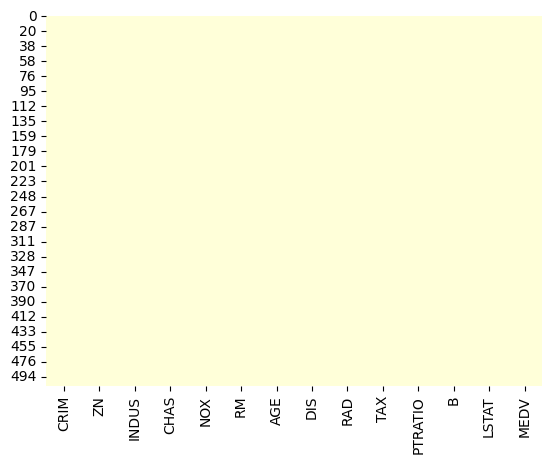

In [ ]:
#CHECKING NULL VALUES from the graph
sns.heatmap(dataset.isnull(), cbar=False, cmap="YlGnBu")

In [34]:
# fix random seed for reproducibility
np.random.seed(5)

In [21]:
# separate the training and target variable
feature = dataset.iloc[:,0:13] #  training variables
target = dataset.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
5  394.12   5.21  

 0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64


In [23]:
#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [9.26677466e-05 0.00000000e+00 2.44207249e-02 ... 4.29870263e-02
  8.12454796e-01 1.85867714e-02]
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]]


In [24]:
#split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, 
                                                    test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)

training data shape:  (315, 13)
testing data shape:  (79, 13)


# **Stochastic gradient descent.**

In [57]:
epochs=250
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(Dropout(0.1))
model.add(keras.layers.Dense(150, activation=tf.nn.relu,use_bias = True))#Hidden Layer
model.add(keras.layers.Dense(150, activation=tf.nn.relu,use_bias = True))
model.add(keras.layers.Dense(150, activation=tf.nn.relu,use_bias = True))
model.add(keras.layers.Dense(150, activation=tf.nn.relu,use_bias = True))
model.add(keras.layers.Dense(1))


#compile model
model.compile(loss='mse', optimizer='sgd', metrics=['mae']) # use metric as mae

#inspect the model
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 150)               2100      
                                                                 
 dropout_8 (Dropout)         (None, 150)               0         
                                                                 
 dense_58 (Dense)            (None, 150)               22650     
                                                                 
 dense_59 (Dense)            (None, 150)               22650     
                                                                 
 dense_60 (Dense)            (None, 150)               22650     
                                                                 
 dense_61 (Dense)            (None, 150)               22650     
                                                                 
 dense_62 (Dense)            (None, 1)               

In [58]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/300
8/8 [==============================] - 1s 28ms/step - loss: 424.1844 - mae: 17.7648 - val_loss: 407.6128 - val_mae: 18.6189
Epoch 2/300
8/8 [==============================] - 0s 7ms/step - loss: 576.7606 - mae: 20.3810 - val_loss: 326.8521 - val_mae: 16.3075
Epoch 3/300
8/8 [==============================] - 0s 8ms/step - loss: 383.3536 - mae: 16.9728 - val_loss: 303.2641 - val_mae: 15.5676
Epoch 4/300
8/8 [==============================] - 0s 6ms/step - loss: 213.6150 - mae: 11.4681 - val_loss: 62.5610 - val_mae: 5.3259
Epoch 5/300
8/8 [==============================] - 0s 7ms/step - loss: 150.3597 - mae: 9.4088 - val_loss: 61.8943 - val_mae: 5.3175
Epoch 6/300
8/8 [==============================] - 0s 7ms/step - loss: 90.2233 - mae: 6.9808 - val_loss: 85.4314 - val_mae: 7.8084
Epoch 7/300
8/8 [==============================] - 0s 7ms/step - loss: 92.4167 - mae: 7.3573 - val_loss: 64.1649 - val_mae: 5.3919
Epoch 8/300
8/8 [==============================] - 0s 7ms/step - lo

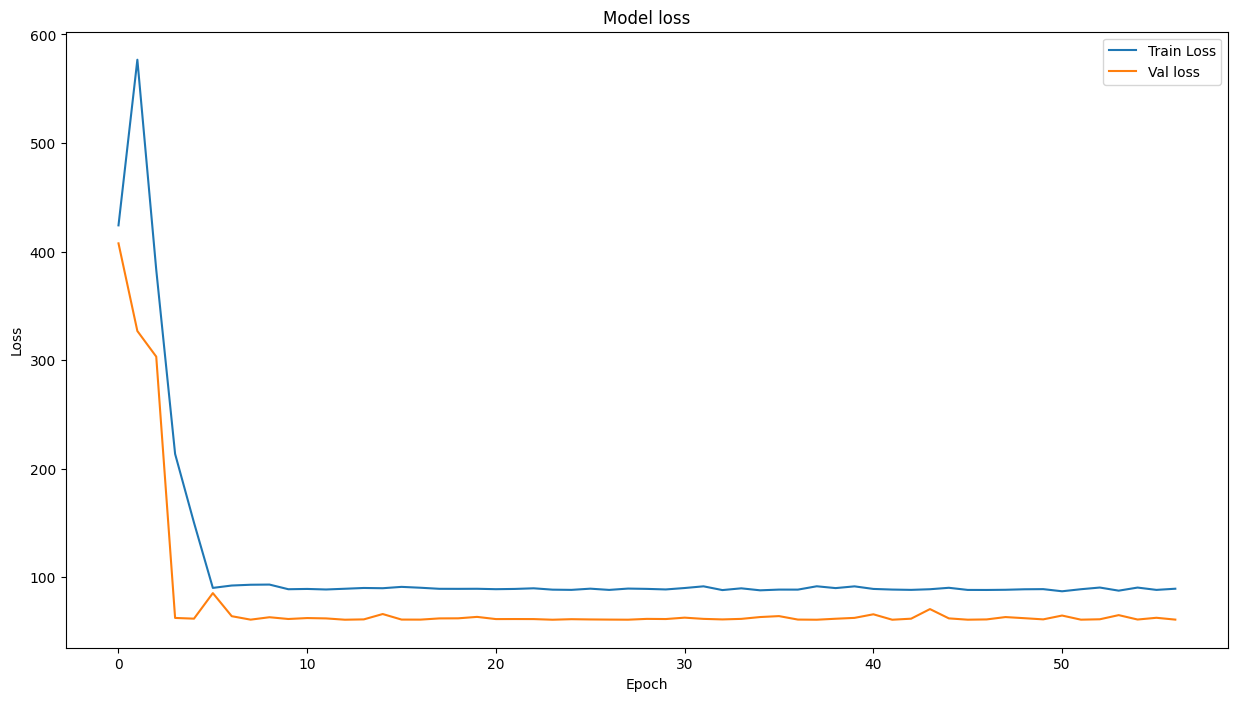

In [60]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()